# INTRODUCCIÓN

El proyecto contiene información de dos tarifas de planes prepago que ofrece un operador de telecomunicaciones. La base de datos contiene información de los consumos de minutos, mensajes o datos de internet, información general de los usuarios y costos adicionales por el exceso en el consumo de cada uno de los servicios, según las tarifas de cada plan.

El análisis de los datos de éstos planes se realizará con el objetivo de determinar si existe una diferencia entre los ingresos promedios de los dos planes, y entre los usuarios de las ciudades de Nueva York-Nueva Jersey en comparación con los usuarios de las demás regiones.

# Tabla de contenido <a id='back'></a>

* [Información general](#informacion)
* [Exploración de datos](#exploracion)
* [Tratamiento de datos ausentes](#ausentes)
* [Conversión de tipos de datos](#conversion)
* [Análisis de datos](#analisis)
* [Comprobación de la hipótesis](#hipotesis)
* [Conclusiones](#end)

# Información general <a id="informacion"></a>

Importamos las librerías necesarias y los datos que componen la base de datos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Se cargan los archivos de los datos.

In [3]:
llamadas=pd.read_csv("/datasets/megaline_calls.csv")
internet=pd.read_csv("/datasets/megaline_internet.csv")
mensajes=pd.read_csv("/datasets/megaline_messages.csv")
planes=pd.read_csv("/datasets/megaline_plans.csv")
usuarios=pd.read_csv("/datasets/megaline_users.csv")

Revisamos la información general de los archivos.

In [4]:
llamadas.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Para contabilizar el consumo de llamadas, internet y mensajes al mes, transformamos las columnas que contienen información de fechas para extraer los respectivos meses.

In [5]:
llamadas["call_date"]= pd.to_datetime(llamadas["call_date"], format='%Y.%m.%d')

In [6]:
llamadas["call_date"].head()

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]

Obtenemos el mes de la fecha.

In [7]:
llamadas["month"]=pd.DatetimeIndex(llamadas["call_date"]).month

obtenemos los consumos de llamadas al mes y llamadas al mes.

In [8]:
consumo_llamadas=llamadas.pivot_table(index=["user_id","month"],values="duration",aggfunc=["count","sum"])
consumo_llamadas.columns=["num_llamadas","minutes"]
consumo_llamadas

num_llamadas  minutes
user_id month                       
1000    12               16   116.83
1001    8                27   171.14
        9                49   297.69
        10               65   374.11
        11               64   404.59
...                     ...      ...
1498    12               39   324.77
1499    9                41   330.37
        10               53   363.28
        11               45   288.56
        12               65   468.10

[2258 rows x 2 columns]

In [9]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


La columna session_date se cambia también a tipo fecha para extraer los meses y el consumo de cada usuario.

In [10]:
internet["session_date"]= pd.to_datetime(internet["session_date"], format='%Y.%m.%d')

In [11]:
internet["month"]=pd.DatetimeIndex(internet["session_date"]).month

In [12]:
consumo_internet=internet.pivot_table(index=["user_id","month"],values="mb_used",aggfunc="sum")
consumo_internet.columns=["megas"]
consumo_internet

megas
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [13]:
mensajes.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


La columna session_date se cambia también a tipo fecha para extraer los meses y el consumo de cada usuario.

In [14]:
mensajes["message_date"]= pd.to_datetime(mensajes["message_date"], format='%Y.%m.%d')

In [15]:
mensajes["month"]=pd.DatetimeIndex(mensajes["message_date"]).month

In [16]:
consumo_mensajes=mensajes.pivot_table(index=["user_id","month"],values="id",aggfunc="count")
consumo_mensajes.columns=["num_mensajes"]
consumo_mensajes

num_mensajes
user_id month              
1000    12               11
1001    8                30
        9                44
        10               53
        11               36
...                     ...
1496    9                21
        10               18
        11               13
        12               11
1497    12               50

[1806 rows x 1 columns]

Se revisa la información de los usuarios y los planes.

In [17]:
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [18]:
usuarios.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Unimos las tablas que nos relacionan la información de los consumos, usuarios y planes.

In [19]:
consumo_total=(pd.concat([consumo_llamadas,consumo_internet,consumo_mensajes],axis=1)
               .reset_index()
               .merge(usuarios,on="user_id",how="outer")
               .merge(planes,left_on="plan",right_on="plan_name"))

In [20]:
consumo_total

,user_id,month,num_llamadas,minutes,megas,num_mensajes,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,16.0,116.83,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11.0,2.0,9.32,2068.37,15.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12.0,9.0,54.79,32118.82,139.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10.0,71.0,450.21,17106.99,21.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11.0,63.0,422.81,23676.72,37.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2299,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2300,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2301,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf


# Exploración de datos. <a id='exploracion'></a>

Se identifica la información general de los datos del nuevo dataframe.

In [21]:
consumo_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   month                  2293 non-null   float64
 2   num_llamadas           2258 non-null   float64
 3   minutes                2258 non-null   float64
 4   megas                  2277 non-null   float64
 5   num_mensajes           1806 non-null   float64
 6   first_name             2303 non-null   object 
 7   last_name              2303 non-null   object 
 8   age                    2303 non-null   int64  
 9   city                   2303 non-null   object 
 10  reg_date               2303 non-null   object 
 11  plan                   2303 non-null   object 
 12  churn_date             160 non-null    object 
 13  messages_included      2303 non-null   int64  
 14  mb_per_month_included  2303 non-null   int64  
 15  minu

Se identifican datos ausentes en las columnas: month, num_llamadas, minutos, megas, num_mensajes y churn_date.

El tipo de datos para la columna month, se considera que debe ser tipo int o número entero.

El tipo de datos para la columna num_llamadas se considera que debe convertirse a tipo int.

El tipo de dato para la columna minutes se considera que debe redondearse para tenerlo realmente en el valor teniedo en cuenta para el cobro del consumo.

El tipo de datos para la variable megas, debe ser tipo int, pero igualmente se considera que debe convertirse a gigas, teniendo en cuenta que el cobro se realiza por gigas.

Para la columna num_mensajes, se considera que debe convertirse a tipo int.

Para la columna reg_date se considera que el tipo de dato debe convertirse a tipo fecha para facilitar el análisis de la información de ésta columna.

Se identifican porcentajes de valores ausentes en cada columna.

In [22]:
ausentes=((consumo_total.isna().sum()/len(consumo_total))*100).sort_values(ascending=False)
ausentes

churn_date               93.052540
num_mensajes             21.580547
num_llamadas              1.953973
minutes                   1.953973
megas                     1.128962
month                     0.434216
user_id                   0.000000
mb_per_month_included     0.000000
usd_per_minute            0.000000
usd_per_message           0.000000
usd_per_gb                0.000000
usd_monthly_pay           0.000000
minutes_included          0.000000
reg_date                  0.000000
messages_included         0.000000
plan                      0.000000
city                      0.000000
age                       0.000000
last_name                 0.000000
first_name                0.000000
plan_name                 0.000000
dtype: float64

Revisamos las columnas que contienen datos ausentes, para validar posibles patrones en los datos.

In [23]:
consumo_total[consumo_total["churn_date"].isnull()].head(20)

,user_id,month,num_llamadas,minutes,megas,num_mensajes,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,16.0,116.83,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10.0,71.0,450.21,17106.99,21.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11.0,63.0,422.81,23676.72,37.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
5,1008,12.0,85.0,600.29,14689.33,26.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
6,1011,6.0,19.0,111.68,6685.11,21.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
7,1011,7.0,63.0,472.66,21046.41,53.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
8,1011,8.0,61.0,460.12,21099.37,54.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
9,1011,9.0,73.0,455.22,16638.46,60.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
10,1011,10.0,76.0,476.99,24575.65,64.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
11,1011,11.0,65.0,475.65,22102.97,58.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate


Los datos ausentes en la columna churn_date (fecha en la que el usuario dejó de usar el servicio), si éste valor es ausente , la tarifa se estaba usando cuando se recopilaron los datos. Se podría optar por eliminar éstos datos, debido al gran porcentaje de datos ausentes y la poca necesidad de ésta variable para realizar el análisis necesario.

In [24]:
consumo_total[consumo_total["num_mensajes"].isnull()].head(20)

,user_id,month,num_llamadas,minutes,megas,num_mensajes,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
60,1041,3.0,4.0,20.63,1586.39,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
61,1041,4.0,60.0,424.66,20601.58,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
62,1041,5.0,54.0,387.32,18259.46,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
63,1041,6.0,52.0,290.27,20033.17,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
64,1041,7.0,65.0,505.47,23400.72,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
65,1041,8.0,58.0,465.63,24733.29,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
66,1041,9.0,46.0,281.64,22056.28,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
67,1041,10.0,65.0,424.69,19097.12,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
68,1041,11.0,49.0,279.51,24967.66,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
69,1041,12.0,57.0,394.77,16863.45,NaN,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate


En los datos ausentes para la columna num_messages simplemente éstos mensajes no se envíaron, ya que no es muy común el uso de éstos mensajes actualmente debido a las demás herramientas incluidas en los teléfonos móviles.

In [25]:
consumo_total[consumo_total["num_llamadas"].isnull()]

,user_id,month,num_llamadas,minutes,megas,num_mensajes,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
16,1028,2.0,NaN,NaN,12591.91,12.0,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
161,1108,12.0,NaN,NaN,233.17,NaN,Porfirio,Kane,45,"Salt Lake City, UT MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
304,1204,11.0,NaN,NaN,21346.95,42.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
305,1204,12.0,NaN,NaN,36730.05,78.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
326,1224,6.0,NaN,NaN,2966.21,5.0,Kelly,Cole,74,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
426,1311,6.0,NaN,NaN,1498.83,NaN,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
704,1482,10.0,NaN,NaN,NaN,2.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
720,1025,NaN,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
721,1269,NaN,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",...,ultimate,2018-12-15,1000,30720,3000,70,7,0.01,0.01,ultimate
722,1275,NaN,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate


Las columnas num_llamadas y minutos, parecen ser simétricas.

In [26]:
consumo_total[consumo_total["minutes"].isnull()]

,user_id,month,num_llamadas,minutes,megas,num_mensajes,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
16,1028,2.0,NaN,NaN,12591.91,12.0,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
161,1108,12.0,NaN,NaN,233.17,NaN,Porfirio,Kane,45,"Salt Lake City, UT MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
304,1204,11.0,NaN,NaN,21346.95,42.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
305,1204,12.0,NaN,NaN,36730.05,78.0,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
326,1224,6.0,NaN,NaN,2966.21,5.0,Kelly,Cole,74,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
426,1311,6.0,NaN,NaN,1498.83,NaN,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
704,1482,10.0,NaN,NaN,NaN,2.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
720,1025,NaN,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
721,1269,NaN,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",...,ultimate,2018-12-15,1000,30720,3000,70,7,0.01,0.01,ultimate
722,1275,NaN,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate


Efectivamente, las columnas num_llamadas y minutes son simétricas,lo cual se considera lógico ya que si no hay información de las llamadas, no se debe tener información de los minutos. Se considera que éstos datos ausentes podrían reemplazarse por 0, ya que se asume que simplemente el usuario no consumió éste servicio incluido en el plan.

In [27]:
consumo_total[consumo_total["megas"].isnull()].head(20)

,user_id,month,num_llamadas,minutes,megas,num_mensajes,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
704,1482,10.0,NaN,NaN,NaN,2.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
720,1025,NaN,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
721,1269,NaN,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",...,ultimate,2018-12-15,1000,30720,3000,70,7,0.01,0.01,ultimate
722,1275,NaN,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
723,1463,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
822,1044,8.0,1.0,12.45,NaN,NaN,Devora,Galloway,74,"Albuquerque, NM MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
1453,1222,6.0,2.0,12.50,NaN,2.0,Cleo,Anderson,18,"Los Angeles-Long Beach-Anaheim, CA MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
1851,1340,8.0,8.0,43.28,NaN,8.0,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
1853,1340,10.0,70.0,411.25,NaN,62.0,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2013,1393,10.0,9.0,68.65,NaN,4.0,Wilfredo,Rosa,44,"Knoxville, TN MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf


En la columna "megas", los valores ausentes pueden relacionarse con que el usuario simplemente no consumió éste servicio del plan.

In [28]:
consumo_total[consumo_total["month"].isnull()].head(30)

,user_id,month,num_llamadas,minutes,megas,num_mensajes,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
720,1025,NaN,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
721,1269,NaN,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",...,ultimate,2018-12-15,1000,30720,3000,70,7,0.01,0.01,ultimate
722,1275,NaN,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
723,1463,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
2297,1129,NaN,NaN,NaN,NaN,NaN,Marin,Bolton,70,"Baton Rouge, LA MSA",...,surf,2018-12-27,50,15360,500,20,10,0.03,0.03,surf
2298,1143,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2299,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2300,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2301,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2302,1473,NaN,NaN,NaN,NaN,NaN,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",...,surf,NaN,50,15360,500,20,10,0.03,0.03,surf


Para la columna month, es probable que simplemente el usuario no haya realizado el pago del plan para los meses ausentes, teniendo en cuenta que para éstos meses no se reportan consumos de llamadas, internet ni mensajes. Para éstas filas donde no hay datos del mes, podríamos simplemente entonces eliminar éstos datos, teniendo en cuenta que el porcentaje donde encontramos datos ausentes de los meses es menor al 1%.

## Tratamiento de datos ausentes. <a id='ausentes'></a>

Se tratan los datos ausentes encontrados en las columnas del dataframe.

Columna **churn_date.**

Para los datos ausentes en la columna churn_date, se considera que ésta columna podría eliminarse, teniendo en cuenta las pocas filas que contienen información y la poca relación de ésta columna con las demás variables.

In [29]:
consumo_total=consumo_total.drop(["churn_date"], axis=1)

Columna **num_llamadas**

Para rellenar los datos ausentes en la columna "num_llamadas", "minutes" y "megas" se decide rellenar los datos con el valor de cero, ya que se asume que simplemente no se realizaron llamadas, y por ésta razón tampoco se tienen entonces valores de minutos en las filas donde no se tienen datos de llamadas, y adicionalmente tampoco se consumieron megas.

In [30]:
consumo_total["num_llamadas"]=consumo_total["num_llamadas"].fillna(0)

In [31]:
consumo_total["num_llamadas"].isnull().sum()

0

Columna **minutes**

In [32]:
consumo_total["minutes"]=consumo_total["minutes"].fillna(0)

In [33]:
consumo_total["minutes"].isnull().sum()

0

Consumo **megas**

In [34]:
consumo_total["megas"]=consumo_total["megas"].fillna(0)

In [35]:
consumo_total["megas"].isnull().sum()

0

Consumo **num_mensajes**

Los valores ausentes en la columna num_mensajes, se rellenan con cero porque se asume que por parte de los usuarios no se enviaron mensajes y por ésta razón no se tienen datos del consumo.

In [36]:
consumo_total["num_mensajes"]=consumo_total["num_mensajes"].fillna(0)

In [37]:
consumo_total["num_mensajes"].isnull().sum()

0

Datos ausentes en la columna **"month".**

Se opta por eliminar éstos datos, ya que puede asumirse que se atribuyen a meses en los que los usuarios no pagaron su plan, por lo cual tampoco se encuentran entonces datos de ningún tipo de consumo. Se opta por eliminarlos además por el bajo porcentaje de datos ausentes (0.43)

In [38]:
consumo_total=consumo_total.dropna(subset=["month"])

In [39]:
consumo_total["month"].unique()

array([12., 11., 10.,  6.,  7.,  8.,  9.,  2.,  3.,  4.,  5.,  1.])

Verificamos nuevamente los valores ausentes para ésta columna.

In [40]:
consumo_total["month"].isnull().sum()

0

In [41]:
consumo_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2296
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   float64
 2   num_llamadas           2293 non-null   float64
 3   minutes                2293 non-null   float64
 4   megas                  2293 non-null   float64
 5   num_mensajes           2293 non-null   float64
 6   first_name             2293 non-null   object 
 7   last_name              2293 non-null   object 
 8   age                    2293 non-null   int64  
 9   city                   2293 non-null   object 
 10  reg_date               2293 non-null   object 
 11  plan                   2293 non-null   object 
 12  messages_included      2293 non-null   int64  
 13  mb_per_month_included  2293 non-null   int64  
 14  minutes_included       2293 non-null   int64  
 15  usd_

# Conversión de tipos de datos. <a id='conversion'></a>

Se convierten los tipos de datos en las columnas que deben modificarse.

In [42]:
consumo_total["user_id"]=consumo_total["user_id"].astype(object)

In [43]:
consumo_total["month"]=consumo_total["month"].astype(int)

In [44]:
consumo_total["num_llamadas"]=consumo_total["num_llamadas"].astype(int)

In [45]:
consumo_total["num_mensajes"]=consumo_total["num_mensajes"].astype(int)

In [46]:
consumo_total["age"]=consumo_total["age"].astype(int)

In [47]:
pd.to_datetime(consumo_total["reg_date"],format='%Y.%m.%d')

0      2018-12-24
1      2018-11-27
2      2018-11-27
3      2018-08-03
4      2018-08-03
          ...    
2292   2018-02-04
2293   2018-05-06
2294   2018-05-06
2295   2018-05-06
2296   2018-05-06
Name: reg_date, Length: 2293, dtype: datetime64[ns]

Verificamos nuevamente la información general del DataFrame.

In [48]:
consumo_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2296
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   object 
 1   month                  2293 non-null   int64  
 2   num_llamadas           2293 non-null   int64  
 3   minutes                2293 non-null   float64
 4   megas                  2293 non-null   float64
 5   num_mensajes           2293 non-null   int64  
 6   first_name             2293 non-null   object 
 7   last_name              2293 non-null   object 
 8   age                    2293 non-null   int64  
 9   city                   2293 non-null   object 
 10  reg_date               2293 non-null   object 
 11  plan                   2293 non-null   object 
 12  messages_included      2293 non-null   int64  
 13  mb_per_month_included  2293 non-null   int64  
 14  minutes_included       2293 non-null   int64  
 15  usd_

Realizamos la conversión de la variable de megas a gigabytes. 1GB=1024 Megabytes.

In [49]:
consumo_total["megas"]=consumo_total["megas"]/1024

Cambiamos el nombre de la columna megas por gigas, debido a la conversión.

In [50]:
consumo_total=consumo_total.rename(columns={
    "megas":"gigas"
})

Realizamos también la conversión de la columna "mb_per_month_included" para facilitar el análisis del cobro por giga.

In [51]:
consumo_total["mb_per_month_included"]=consumo_total["mb_per_month_included"]/1024

In [52]:
consumo_total["mb_per_month_included"].head()

0    30.0
1    30.0
2    30.0
3    30.0
4    30.0
Name: mb_per_month_included, dtype: float64

Revisamos nuevamente la información general del DataFrame.

In [53]:
consumo_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2296
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   object 
 1   month                  2293 non-null   int64  
 2   num_llamadas           2293 non-null   int64  
 3   minutes                2293 non-null   float64
 4   gigas                  2293 non-null   float64
 5   num_mensajes           2293 non-null   int64  
 6   first_name             2293 non-null   object 
 7   last_name              2293 non-null   object 
 8   age                    2293 non-null   int64  
 9   city                   2293 non-null   object 
 10  reg_date               2293 non-null   object 
 11  plan                   2293 non-null   object 
 12  messages_included      2293 non-null   int64  
 13  mb_per_month_included  2293 non-null   float64
 14  minutes_included       2293 non-null   int64  
 15  usd_

Pasamos a realizar los redondeos de los datos para las columnas "gigas" y "minutes", para facilitar la obtención de los consumos y cobros totales para cada tipo de plan.

In [54]:
consumo_total["gigas"]=consumo_total["gigas"].apply(np.ceil)

In [55]:
consumo_total["minutes"]=consumo_total["minutes"].apply(np.ceil)

Las columnas minutes y gigas se convierten de tipo float a tipo entero.

In [56]:
consumo_total["minutes"]=consumo_total["minutes"].astype(int)

In [57]:
consumo_total["gigas"]=consumo_total["gigas"].astype(int)

Revisamos nuevamente el DataFrame para validar los redondeos de las variables de las gigas y los minutos consumidos.

In [58]:
consumo_total.head()

,user_id,month,num_llamadas,minutes,gigas,num_mensajes,first_name,last_name,age,city,reg_date,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16,117,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1000,30.0,3000,70,7,0.01,0.01,ultimate
1,1006,11,2,10,3,15,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,1000,30.0,3000,70,7,0.01,0.01,ultimate
2,1006,12,9,55,32,139,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,1000,30.0,3000,70,7,0.01,0.01,ultimate
3,1008,10,71,451,17,21,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1000,30.0,3000,70,7,0.01,0.01,ultimate
4,1008,11,63,423,24,37,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1000,30.0,3000,70,7,0.01,0.01,ultimate


In [59]:
consumo_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2296
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   object 
 1   month                  2293 non-null   int64  
 2   num_llamadas           2293 non-null   int64  
 3   minutes                2293 non-null   int64  
 4   gigas                  2293 non-null   int64  
 5   num_mensajes           2293 non-null   int64  
 6   first_name             2293 non-null   object 
 7   last_name              2293 non-null   object 
 8   age                    2293 non-null   int64  
 9   city                   2293 non-null   object 
 10  reg_date               2293 non-null   object 
 11  plan                   2293 non-null   object 
 12  messages_included      2293 non-null   int64  
 13  mb_per_month_included  2293 non-null   float64
 14  minutes_included       2293 non-null   int64  
 15  usd_

Se hallan los totales de consumo de llamadas y minutos por usuario al mes.

In [60]:
data_llamadas=consumo_total.pivot_table(index=["user_id","month"],values=["num_llamadas","minutes"],aggfunc="sum")
data_llamadas

minutes  num_llamadas
user_id month                       
1000    12         117            16
1001    8          172            27
        9          298            49
        10         375            65
        11         405            64
...                ...           ...
1498    12         325            39
1499    9          331            41
        10         364            53
        11         289            45
        12         469            65

[2293 rows x 2 columns]

Se calculan los ingresos, de acuerdo a las tarifas adicionales de consumo de minutos. 

In [61]:
consumo_total["exceso_minutos"]=(consumo_total["minutes"]-consumo_total["minutes_included"])*consumo_total["usd_per_minute"]

Si el consumo de minutos del usuario es mayor a los minutos incluidos, se calcula la tarifa por exceder la cantidad de minutos según del plan. De lo contrario, el exceso de minutos es igual a cero.

In [62]:
consumo_total.loc[consumo_total["exceso_minutos"]<0, "exceso_minutos"]=0

Se calcula el ingreso por cada usuario para los mensajes.

In [63]:
data_mensajes=consumo_total.pivot_table(index=["user_id","month"],values="num_mensajes",aggfunc="sum")
data_mensajes

num_mensajes
user_id month              
1000    12               11
1001    8                30
        9                44
        10               53
        11               36
...                     ...
1498    12                0
1499    9                 0
        10                0
        11                0
        12                0

[2293 rows x 1 columns]

In [64]:
consumo_total["exceso_mensajes"]=(consumo_total["num_mensajes"]-consumo_total["messages_included"])*consumo_total["usd_per_message"]

Se calcula el costo por consumo adicional de mensajes. Si el consumo de mensajes del usuario es menor a los mensajes incluidos en el plan, no existe entonces un exceso por mensaje.

In [65]:
consumo_total.loc[consumo_total["exceso_mensajes"]<0, "exceso_mensajes"]=0

Se calcula el ingreso por cada usuario por las gigas.

In [66]:
data_gigas=consumo_total.pivot_table(index=["user_id","month"],values="gigas",aggfunc="sum")
data_gigas

gigas
user_id month       
1000    12         2
1001    8          7
        9         14
        10        22
        11        19
...              ...
1498    12        23
1499    9         13
        10        20
        11        17
        12        22

[2293 rows x 1 columns]

In [67]:
consumo_total["exceso_gigas"]=(consumo_total["gigas"]-consumo_total["mb_per_month_included"])*consumo_total["usd_per_gb"]

In [68]:
consumo_total.loc[consumo_total["exceso_gigas"]<0, "exceso_gigas"]=0

Revisamos nuevamente la tabla con los respectivas columnas que incluyen el pago adicional por cada tipo de consumo.

In [69]:
consumo_total.head()

,user_id,month,num_llamadas,minutes,gigas,num_mensajes,first_name,last_name,age,city,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,exceso_minutos,exceso_mensajes,exceso_gigas
0,1000,12,16,117,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30.0,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0
1,1006,11,2,10,3,15,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30.0,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0
2,1006,12,9,55,32,139,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30.0,3000,70,7,0.01,0.01,ultimate,0.0,0.0,14.0
3,1008,10,71,451,17,21,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30.0,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0
4,1008,11,63,423,24,37,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30.0,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0


Creamos una nueva columna que de la información del pago total.

In [70]:
consumo_total["pago_total"]=consumo_total["usd_monthly_pay"]+consumo_total["exceso_minutos"]+consumo_total["exceso_mensajes"]+consumo_total["exceso_gigas"]

In [71]:
consumo_total.head()

,user_id,month,num_llamadas,minutes,gigas,num_mensajes,first_name,last_name,age,city,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,exceso_minutos,exceso_mensajes,exceso_gigas,pago_total
0,1000,12,16,117,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
1,1006,11,2,10,3,15,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
2,1006,12,9,55,32,139,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,14.0,84.0
3,1008,10,71,451,17,21,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0
4,1008,11,63,423,24,37,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,70.0


# Análisis de los datos. <a id='analisis'></a>

Analizamos los consumos de minutos por parte de los usuarios cada mes.

In [72]:
consumo_mensual_minutos=consumo_total.pivot_table(index=["user_id","month","plan_name"],values=["minutes"],aggfunc="sum")
consumo_mensual_minutos

minutes
user_id month plan_name         
1000    12    ultimate       117
1001    8     surf           172
        9     surf           298
        10    surf           375
        11    surf           405
...                          ...
1498    12    surf           325
1499    9     surf           331
        10    surf           364
        11    surf           289
        12    surf           469

[2293 rows x 1 columns]

Hallamos la media para éstos consumos.

In [73]:
consumo_mensual_minutos.groupby("plan_name")["minutes"].mean()

plan_name
surf        405.250477
ultimate    406.708333
Name: minutes, dtype: float64

El promedio de consumo de minutos que requieren los ususarios de la tarifa surf es aproximadamente de 405. Para los usuarios de ultimate el consumo promedio de minutos es aproximádamente de 406. Se encuentra un valor relativamente parecido entre los consumos promedios de minutos para los dos tipos de planes.

Hallamos la varianza para éstos consumos.

In [74]:
consumo_mensual_minutos.groupby("plan_name")["minutes"].var()

plan_name
surf        49143.993201
ultimate    51651.661683
Name: minutes, dtype: float64

Se encuentra una varianza mayor para los consumos de minutos del plan ultimate.

Hallamos la desviación estándar para éstos consumos.

In [75]:
consumo_mensual_minutos.groupby("plan_name")["minutes"].std()

plan_name
surf        221.684445
ultimate    227.270019
Name: minutes, dtype: float64

Se encuentra una desviación estándar mayor para los consumos de minutos de los usuarios del plan ultimate. De acuerdo a ésta desviación estándar, existe entonces una mayor variabilidad entre los consumos de minutos de los usuarios del plan ultimate, por lo cual se asume también una diferencia entre la media y la mediana de los datos de los consumos de minutos.

Graficamos los consumos de minutos por parte de los usuarios del **plan surf.**

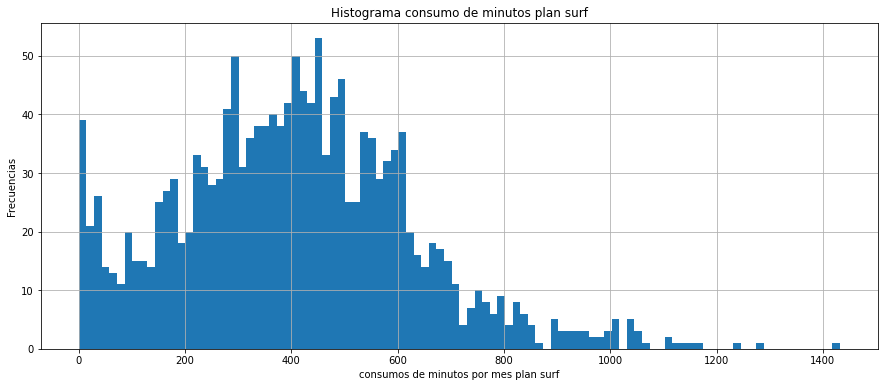

In [76]:
(consumo_mensual_minutos
    .query('plan_name=="surf"')
    .hist(bins=100,figsize=(15,6))
)
plt.title("Histograma consumo de minutos plan surf")
plt.xlabel("consumos de minutos por mes plan surf")
plt.ylabel("Frecuencias")
plt.show()

La mayor cantidad de usuarios del plan surf, consumen entre 400 y 500 minutos.

Graficamos los consumos de minutos por parte de los usuarios del **plan ultimate.**

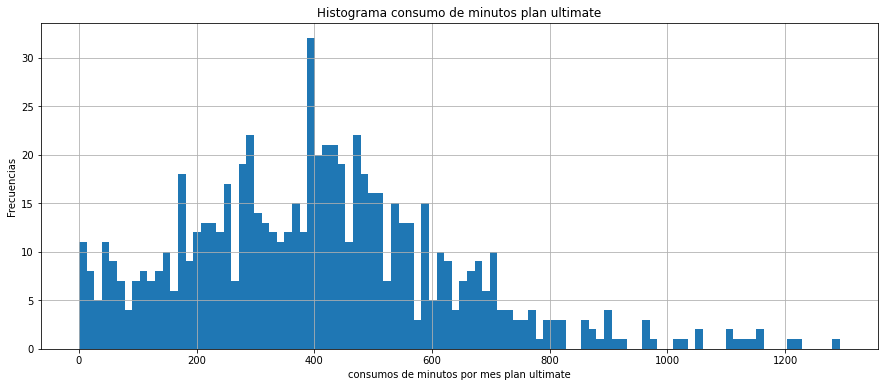

In [77]:
(consumo_mensual_minutos
    .query('plan_name=="ultimate"')
    .hist(bins=100,figsize=(15,6))
)
plt.title("Histograma consumo de minutos plan ultimate")
plt.xlabel("consumos de minutos por mes plan ultimate")
plt.ylabel("Frecuencias")
plt.show()

La mayor cantidad de usuarios del plan ultimate, reportan un consumo de cero de minutos.

De acuerdo al histograma que nos muestra los consumos de minutos por parte de los usuarios, se evidencia que la mayor cantidad de usuarios consumen entre 300 y 400 minutos.

Analizamos los consumos de mensajes por parte de los usuarios cada mes.

In [154]:
consumo_mensual_mensajes=consumo_total.pivot_table(index=["user_id","month","plan_name"],values=["num_mensajes"],aggfunc="sum")
consumo_mensual_mensajes

num_mensajes
user_id month plan_name              
1000    12    ultimate             11
1001    8     surf                 30
        9     surf                 44
        10    surf                 53
        11    surf                 36
...                               ...
1498    12    surf                  0
1499    9     surf                  0
        10    surf                  0
        11    surf                  0
        12    surf                  0

[2293 rows x 1 columns]

Hallamos el consumo de mensajes promedio por parte de los usuarios.

In [155]:
consumo_mensual_mensajes.groupby("plan_name")["num_mensajes"].mean()

plan_name
surf        31.159568
ultimate    37.551389
Name: num_mensajes, dtype: float64

Se encuentra una media de consumo mayor para los consumos de mensajes de los usuarios del pla ultimate.

Hallamos la varianza para los consumos de mensajes por parte de los usuarios de cada plan.

In [156]:
consumo_mensual_mensajes.groupby("plan_name")["num_mensajes"].var()

plan_name
surf        1126.724522
ultimate    1208.756744
Name: num_mensajes, dtype: float64

La varianza en el consumo de mensajes es mayor para los ususarios del plan ultimate.

Hallamos la desviación estándar para los consumos de mensajes por parte de los ususrios de cada plan.

In [157]:
consumo_mensual_mensajes.groupby("plan_name")["num_mensajes"].std()

plan_name
surf        33.566717
ultimate    34.767179
Name: num_mensajes, dtype: float64

De acuerdo a las desviaciones estándar de los tipos de planes para los consumos de mensajes, se encuentra mayor variabilidad de datos en los consumos de los usuarios del plan ultimate.

Graficamos histograma para el consumo de mensajes por parte de los ususarios, según el plan.

Graficamos los consumos de mensajes para los usuarios del **plan surf.**

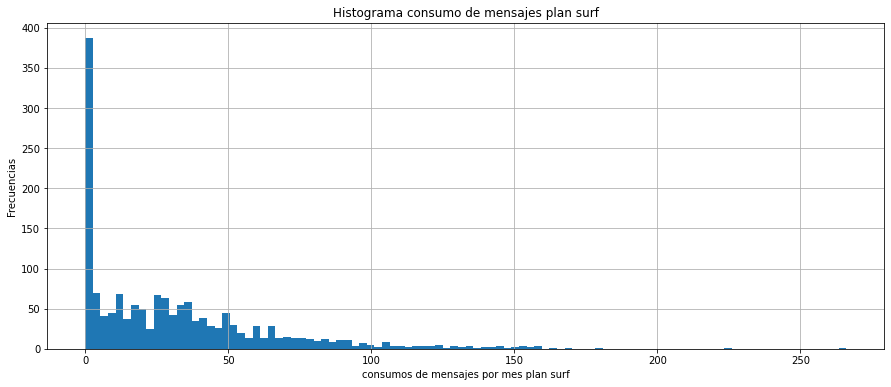

In [206]:
(consumo_mensual_mensajes
    .query('plan_name=="surf"')
    .hist(bins=100,figsize=(15,6))
)
plt.title("Histograma consumo de mensajes plan surf")
plt.xlabel("consumos de mensajes por mes plan surf")
plt.ylabel("Frecuencias")
plt.show()

De acuerdo al histograma que nos relaciona los consumos de mensajes por los usuarios del plan surf, la mayoría de los usuarios reportan un consumo de mensajes de cero durante el mes.

Graficamos los consumos de mensajes para los usuarios del **plan ultimate.**

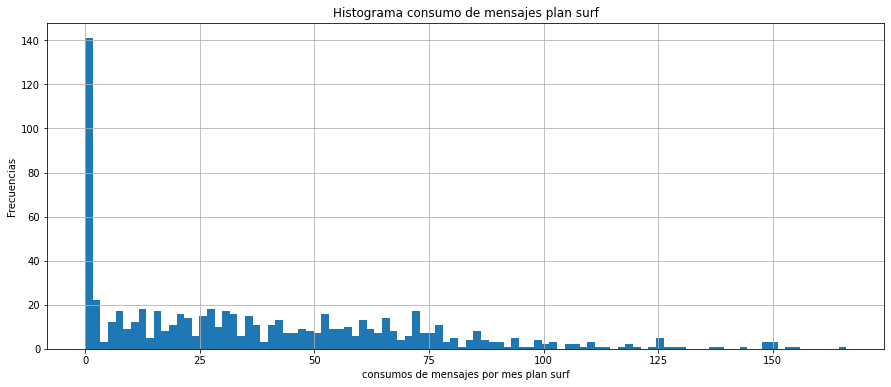

In [207]:
(consumo_mensual_mensajes
    .query('plan_name=="ultimate"')
    .hist(bins=100,figsize=(15,6))
)
plt.title("Histograma consumo de mensajes plan surf")
plt.xlabel("consumos de mensajes por mes plan surf")
plt.ylabel("Frecuencias")
plt.show()

De acuerdo con el histograma que nos relaciona los consumos de mensajes por parte de los usuarios del plan ultimate, se encuentra que la mayoría de los ususarios no hacen uso de éste servicio.

Analizamos los consumos de gigas por parte de los usuarios cada mes.

In [159]:
consumo_mensual_gigas=consumo_total.pivot_table(index=["user_id","month","plan_name"],values=["gigas"],aggfunc="sum")
consumo_mensual_gigas

gigas
user_id month plan_name       
1000    12    ultimate       2
1001    8     surf           7
        9     surf          14
        10    surf          22
        11    surf          19
...                        ...
1498    12    surf          23
1499    9     surf          13
        10    surf          20
        11    surf          17
        12    surf          22

[2293 rows x 1 columns]

Calculamos la media para los consumos de gigas por mes.

In [160]:
consumo_mensual_gigas.groupby("plan_name")["gigas"].mean()

plan_name
surf        16.670693
ultimate    17.306944
Name: gigas, dtype: float64

Los promedios de consumo de gigas para los usuarios del plan ultimate es un poco mayor que para los consumos de los usuarios del plan surf.

Calculamos la varianza para los consumos de gigas por parte de los usuarios de acuerdo al tipo de plan

In [161]:
consumo_mensual_gigas.groupby("plan_name")["gigas"].var()

plan_name
surf        61.58360
ultimate    58.83055
Name: gigas, dtype: float64

Para los consumos de gigas, se encuentra una varianza mayor en los usuarios del plan surf.

Calculamos la desviación estándar del consumo de gigas para los usuarios, de acuerdo al plan.

In [191]:
consumo_mensual_gigas.groupby("plan_name")["gigas"].std()

plan_name
surf        7.847522
ultimate    7.670108
Name: gigas, dtype: float64

Se encuentra mayor desviación entre los datos de consumo de gigas de los usuarios del plan surf.

Generamos el histograma para los consumos de gigas del **plan surf.**

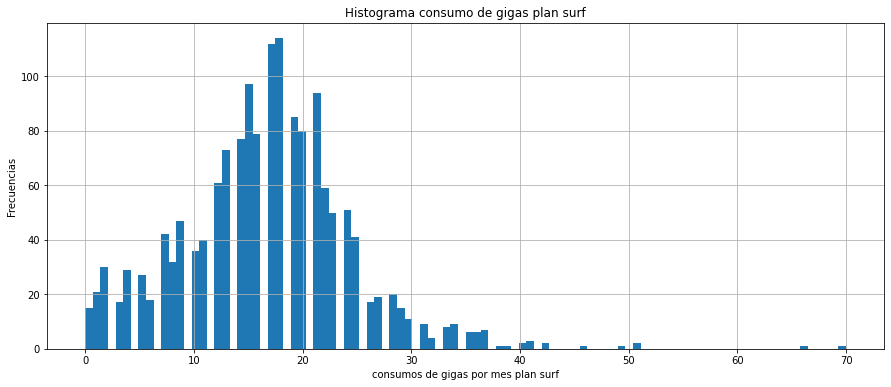

In [202]:
(consumo_mensual_gigas
    .query('plan_name=="surf"')
    .hist(bins=100,figsize=(15,6))
)
plt.title("Histograma consumo de gigas plan surf")
plt.xlabel("consumos de gigas por mes plan surf")
plt.ylabel("Frecuencias")
plt.show()

De acuerdo al histograma que nos relaciona los consumos de gigas por parte de los usuarios del plan ultimate, en su mayoría se reportan consumos apróximadamente de 18 gigas  de datos al mes.

Generamos el histograma para el consumo de gigas del plan **ultimate**.

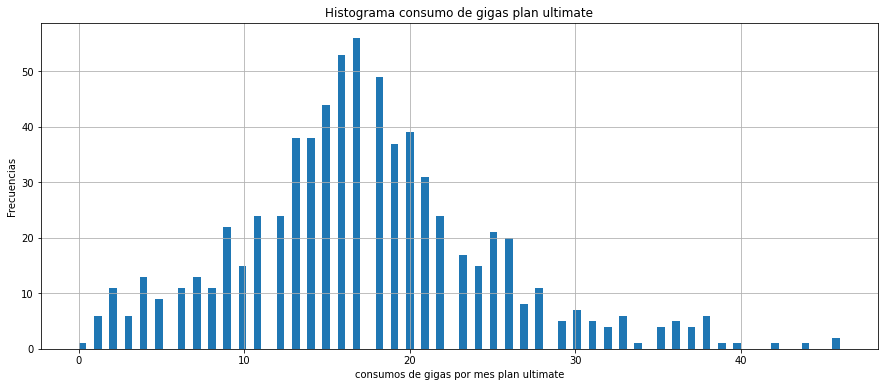

In [205]:
(consumo_mensual_gigas
    .query('plan_name=="ultimate"')
    .hist(bins=100,figsize=(15,6))
)
plt.title("Histograma consumo de gigas plan ultimate")
plt.xlabel("consumos de gigas por mes plan ultimate")
plt.ylabel("Frecuencias")
plt.show()

De acuerdo con el histograma que nos relaciona el consumo de gigas por parte de los usuarios del plan ultimate, la mayor cantidad de ususarios consumen apróximadamente 18 gigas de datos.

# Comprobación de la hipótesis. <a id='hipotesis'></a>

Analizamos si los promedios de ingresos por parte de los ususarios para los planes Ultimate y Surf difiere.

Para comprobar la hipótesis, analizamos la igualdad de las medias de los ingresos de los dos tipos de planes. Para hacerlo utilizamos la prueba T-test, que es la que nos permite comparar los promedios.

**Para éste caso, (H0) o hipótesis nula considera que no hay diferencias o cambios al comparar las medias para los ingresos de los planes de forma independiente.**

**La hipótesis alternativa (Ha) considera que la hipótesis nula no se cumple, y en el caso de comparar las medias independientes para los dos tipos de planes, éstas difieren.**

Calculamos los ingresos para los usuarios de los planess Ultimate y Surf, para comprobar si éstos promedios de ingresos difieren o no.

In [211]:
from scipy import stats as st
import numpy as np
from scipy.stats import ttest_ind

In [212]:
ingreso_ultimate=consumo_total[consumo_total["plan_name"]=="ultimate"]["pago_total"]
ingreso_ultimate

0      70.0
1      70.0
2      84.0
3      70.0
4      70.0
       ... 
715    70.0
716    70.0
717    70.0
718    70.0
719    70.0
Name: pago_total, Length: 720, dtype: float64

In [96]:
ingreso_surf=consumo_total[consumo_total["plan_name"]=="surf"]["pago_total"]
ingreso_surf

724      20.00
725      20.00
726      90.09
727      60.00
728      60.00
         ...  
2292    100.00
2293     20.00
2294     70.00
2295     40.00
2296     90.00
Name: pago_total, Length: 1573, dtype: float64

In [97]:
alpha=0.05 #Se determina el nivel de significancia.

In [98]:
results=st.ttest_ind(ingreso_ultimate,ingreso_surf)

print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 9.470478215100305e-09
Rechazamos la hipótesis nula


De acuerdo con la prueba T-test utilizada para comprobar la prueba de hipótesis, se puede decir entonces que la hipótesis nula podríamos rechazarla debido a que el valor de p es demasiado bajo y podemos concluir que existe una diferencia muy significativa entre los ingresos de ambos planes. 

Calculamos los ingresos promedios para los usuarios de las diferentes ciudades, para comprobar si los ingresos son diferentes para los usuarios en el área de Nueva York-Nueva Jersey.

Analizamos las diferentes ciudades o regiones que conforman la base de datos.

In [99]:
consumo_total["city"].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Nashville-Davidson–Murfreesboro–Franklin, TN MSA',
       'Columbus, OH MSA', 'Las Vegas-Henderson-Paradise, NV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'Columbia, SC MSA', 'San Antonio-New Braunfels, TX MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Phoenix-Mesa-Chandler, AZ MSA',
       'Riverside-San Bernardino-Ontario, CA MSA',
       'Salt Lake City, 

Analizamos los ingresos de los usuarios de Nueva York y Nueva Jersey.

**Para éste caso, (H0) o hipótesis nula considera que no hay diferencias o cambios al comparar las medias para los ingresos de los usuarios de las regiones de Nueva York y Nueva Jersey.**

**La hipótesis alternativa (Ha) considera que la hipótesis nula no se cumple, y en el caso de comparar las medias independientes para los usuarios de Nueva York y Nueva Jersey con las demás regiones, éstas difieren.**

In [100]:
ingreso_city=consumo_total[consumo_total["city"]=="New York-Newark-Jersey City, NY-NJ-PA MSA"]["pago_total"]
ingreso_city

30       70.0
31       70.0
32       70.0
33       70.0
34       70.0
        ...  
2288     70.0
2289    100.0
2290     80.0
2291     60.0
2292    100.0
Name: pago_total, Length: 377, dtype: float64

Analizamos los ingresos de los usuarios que se encuentran en regiones diferentes de Nueva York y Nueva Jersey.

In [101]:
ingreso_city2=consumo_total[consumo_total["city"]!="New York-Newark-Jersey City, NY-NJ-PA MSA"]["pago_total"]
ingreso_city2

0       70.0
1       70.0
2       84.0
3       70.0
4       70.0
        ... 
2281    40.0
2293    20.0
2294    70.0
2295    40.0
2296    90.0
Name: pago_total, Length: 1916, dtype: float64

In [102]:
alpha=0.05 #Determinamos el nivel de significancia.

In [103]:
results2=st.ttest_ind(ingreso_city,ingreso_city2)

print('p-value:',results2.pvalue)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.04076784279879048
Rechazamos la hipótesis nula


De acuerdo a la hipótesis T-test rechazamos la hipótesis nula debido al bajo valor de p, que nos muestra que efectivamente los ingresos para los usuarios de las regiones de Nueva York-Nueva Jersey difieren en comparación con las demás ciudades.

# Conclusiones. <a id='end'></a>

Para analizar la totalidad de consumo de los usuarios y las características de los planes, de realiza una concatenación de ésta información en una sola tabla para facilitar el análisis de la información.

Se identifican datos ausentes en las columnas month, num_llamadas, minutos, megas, num_mensajes y churn_date.

Se identifican las columnas en las que el tipo de dato no se considera apropiado y se realizan las respectivas correciones. Las columnas en las que se cambia el tipo de datoson: month (float-int),num_llamadas(float-int),num_mensajes(float-int), reg_date (se pasa a tipo fecha), user_id (se pasa a tipo object).

Se revisan los procentajes de datos ausentes en las columnas, en lo cual se identifica que el mayor procentaje de datos ausentes se encuentran en la columna churn_date. Se opta por eliminar ésta columna, debido a la poca información de datos que contiene ésta columna y debido a que se considera que omitir ésta columna no afecta las demás variables de la base de datos.

Se encuentran datos ausentes en las columnas num_mensajes, num_llamadas, minutes, megas y mes. En la columna mes, se decide eliminar las filas en las que se reportan datos ausentes, ya que se asume que para éstos meses los usuarios posiblemente no realizaron el pago del plan. Para los datos ausentes en las columnas num_mensajes, num_llamadas, minutes y megas, se decide rellenar los vaores ausentes con cero, ya que se asume que si se encuentran en cero, es porque éste servicio no fue consumido durante el mes.

En la columna megas, se realiza la conversión de megas a gigas para facilitar el análisis del consumo y valor a cobrar en el plan. Se redondea además hacia arriba. El nombre de la columna megas se cambia a gigas.

En la columna mb_per_month_included también se realiza la conversión de megas a gigas para facilitar el análisis de acuerdo a las cantidades de gigas consumidas.

La columna minutes, se redondea hacia arriba para hallar los minutos realmente que serán tenidos en cuenta para el cobro total del plan.

Se hallan los totales de consumo de llamadas, minutos y gigas al mes, con ayuda de una tabla dinámica. Igualmente se calculan los excesos en el consumo de minutos, mensajes o gigas y para los casos en los que no se presentaban consumos adicionales, éste exceso de consumo era cero. Teniendo en cuenta éstos excesos de consumo, se calcula para cada usuario el pago total.

Se calculan los consumos por plan para los ususarios al mes.

Las medias de consumo de minutos para los usuarios del plan ultimate es de 406.71. Para los usuarios del plan surf, ésta media de consumo es de 405.25 al mes. La varianza para los consumos de minutos del plan surf es de 49143, para el plan ultimate es de 51651.La desviación estándar para los consumos de minutos para el plan ultimate es de 227.27, para el plan surf la desviación estándar es de 221.68, por lo cual se presenta entonces una mayor variabilidad entre los datos de consumo de minutos de los usuarios del plan ultimate.De acuerdo al histograma de los consumos de minutos para los usuarios del plan surf, la mayor cantidad de los usuarios de éste plan consumen entre 400 y 500 minutos, el histograma de los consumos de minutos de los usuarios del plan ultimate en su mayoría reportan un consumo de minutos entre 380 y 400 minutos.

Las media de consumo  de mensajes para el plan surf es de 31.16 mensajes. Para el plan ultimate es de 37.55 mensajes. La varianza de consumo de mensajes para el plan surf es de 1126.7, para el plan ultimate la varianza de consumo de mensajes es de 1208.75. La desviación estándar para el consumo de mensajes de los ususarios de los planes Surf es de 33.56, para los consumos de mensajes del plan ultimate la desviación estándar es de 34.76, por lo cual se presenta mayor varibilidad entre los consumos de mensajes de los usuarios del plan ultimate.De acuerdo a los histogramas de consumo de mensajes para los usuarios de cada plan, la mayoría de los usuarios del plan surf y ultimate, reportan un consumo de mensajes de cero.  

La media de consumo de gigas por parte de los usuarios para el plan surf es de 16.67 gigas, para los usuarios ultimate es de 17.30 gigas. La varianza de consumo de gigas para los ususarios de surf es de 61.58, para el plan ultimate la varianza de consumo de gigas es de 58.83. La desviación estándar de l consumo de gigas para el plan surf es de 7.84, para el plan de ultimate la desviación estándar del consumo de gigas es de 7.67. Para los consumos de gigas, se presenta mayor varibilidad de consumo en los usuarios del plan surf. El histograma que relaciona las frecuencias de consumo de gigas por parte de los  usuarios del plan surf, nos muestra que la mayoría de los ususarios consumen alrededor de 18 gigas al mes. Para el caso de los usuarios del plan ultimate, se reporta  en su mayoría un consumo tambieén alrededor de 18 gigas.

Para las comprobaciones de la hipótesis, utilizamos la prueba T-test, la cual nos permite comprar los promedios.

En la hipótesis nula (Ho): se considera que no hay diferencias o cambios al comparar las medias para los ingresos de los planes de forma independiente. Igualmente, la hipótesis nula para analizar los ingresos promedios para los ususarios de las regiones de Nueva York- Jersey comparado con los demás países, considera que no hay diferencias entre los ingresos proedios.

La hipótesis alternativa (Ha) considera que la hipótesis nula no se cumple, y en el caso de comparar las medias independientes para los dos tipos de planes, éstas difieren. Para el caso de comparar los ingresos por parte de los usuarios de las ciudades de Nueva york-Nueva Jersey con las demás ciudades la hipótesis alternativa consideran que los ingresos de Nueva York-Nueva Jersey y las demás ciudades si difieren.

El nivel de significancia para realizar la prueba de hipótesis es de 0.05.